In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_1'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_1


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu, Tiền xử lý dữ liệu

In [5]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [7]:
df.shape

(63023, 13)

In [8]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,31/03/2018,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [9]:
df['Suburb'].value_counts()

Reservoir           1241
Bentleigh East       845
Mount Waverley       831
Richmond             822
Glen Waverley        819
                    ... 
croydon                1
viewbank               1
Warrandyte South       1
Don Valley             1
Gembrook               1
Name: Suburb, Length: 380, dtype: int64

In [10]:
df['Address'].value_counts()

57 Bay Rd           7
52 Station St       7
56 Victoria St      7
3 Parker St         7
3 Donald St         7
                   ..
7/15 River Bvd      1
24 Glenair St       1
15/60 Farnham St    1
126A Winifred St    1
112 Crofton Dr      1
Name: Address, Length: 57754, dtype: int64

In [11]:
df['Rooms'].value_counts()

3     27950
4     15747
2     13248
5      3434
1      2111
6       424
7        61
8        29
10        7
9         5
12        4
31        1
16        1
11        1
Name: Rooms, dtype: int64

In [12]:
df['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [13]:
df['Method'].value_counts()

S     34063
PI     9790
SP     8916
VB     5956
SN     2674
PN      651
W       484
SA      416
SS       73
Name: Method, dtype: int64

In [14]:
df['SellerG'].value_counts()

Barry            6894
Jellis           5499
Nelson           4739
Ray              4554
hockingstuart    4332
                 ... 
We                  1
Matrix              1
Evolve              1
Kerr                1
Buxton/Find         1
Name: SellerG, Length: 476, dtype: int64

In [15]:
df['Postcode'].value_counts()

3073    1241
3064    1093
3150    1084
3121     904
3046     895
        ... 
3766       1
3797       1
3341       1
3159       1
3091       1
Name: Postcode, Length: 225, dtype: int64

In [16]:
df['Regionname'].value_counts()

Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

In [17]:
df['CouncilArea'].value_counts()

Boroondara City Council           5132
Darebin City Council              4182
Banyule City Council              3656
Monash City Council               3592
Bayside City Council              3331
Brimbank City Council             3296
Moreland City Council             3030
Hume City Council                 2939
Glen Eira City Council            2934
Melbourne City Council            2728
Whittlesea City Council           2545
Moonee Valley City Council        2512
Kingston City Council             2378
Manningham City Council           2225
Maribyrnong City Council          2083
Stonnington City Council          1991
Whitehorse City Council           1811
Port Phillip City Council         1771
Yarra City Council                1698
Wyndham City Council              1542
Maroondah City Council            1451
Hobsons Bay City Council          1351
Knox City Council                 1043
Greater Dandenong City Council     948
Frankston City Council             835
Melton City Council      

In [18]:
def pt_hai_bien_cat_cat(df, col1, col2):
    df = df.dropna(axis=0, subset=[col1, col2])
    table = pd.crosstab(df[col1], df[col2])
    stat, p, dof, expected = chi2_contingency(table)
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('dof: ', dof)
    # sử dụng p-value để so sánh --> tính alpha
    alpha = 0.05
    if p <= alpha:
        print('Reject H0 --> ', col1,' và ', col2, ' là 2 biến phụ thuộc')
    else:
        print('Fail to reject H0 --> ', col1,' và ', col2, ' là 2 biến độc lập')

In [19]:
from scipy.stats import chi2_contingency, chi2

In [20]:
pt_hai_bien_cat_cat(df, 'Regionname', 'CouncilArea')

Statistic:  320563.82916423766
p-value:  0.0
dof:  231
Reject H0 -->  Regionname  và  CouncilArea  là 2 biến phụ thuộc


In [21]:
print(df.groupby('Regionname')['CouncilArea'].value_counts())

Regionname                  CouncilArea                   
Eastern Metropolitan        Manningham City Council           2214
                            Banyule City Council              2172
                            Whitehorse City Council           1811
                            Monash City Council               1650
                            Maroondah City Council            1451
                            Knox City Council                  915
                            Boroondara City Council            149
                            Nillumbik Shire Council             34
Eastern Victoria            Yarra Ranges Shire Council         246
                            Casey City Council                 144
                            Cardinia Shire Council              88
                            Frankston City Council              75
                            Manningham City Council             11
Northern Metropolitan       Darebin City Council              4182
   

In [22]:
pt_hai_bien_cat_cat(df, 'CouncilArea', 'Postcode')

Statistic:  1887566.3652379273
p-value:  0.0
dof:  7392
Reject H0 -->  CouncilArea  và  Postcode  là 2 biến phụ thuộc


In [23]:
print(df.groupby('CouncilArea')['Postcode'].value_counts())

CouncilArea                 Postcode
Banyule City Council        3084        588
                            3083        558
                            3088        528
                            3081        442
                            3079        397
                                       ... 
Yarra Ranges Shire Council  3788          2
                            3799          2
                            3766          1
                            3791          1
                            3797          1
Name: Postcode, Length: 254, dtype: int64


In [24]:
pt_hai_bien_cat_cat(df, 'Postcode', 'Suburb')

Statistic:  14117152.000000002
p-value:  0.0
dof:  84896
Reject H0 -->  Postcode  và  Suburb  là 2 biến phụ thuộc


In [25]:
print(df.groupby('Postcode')['Suburb'].value_counts())

Postcode  Suburb          
3000      Melbourne           287
3002      East Melbourne       83
3003      West Melbourne       88
3006      Southbank           117
3008      Docklands            20
                             ... 
3977      Sandhurst             7
          Botanic Ridge         3
          Cranbourne South      2
3978      Clyde North           6
3980      Warneet               1
Name: Suburb, Length: 380, dtype: int64


# Nhận xét: Các biến 'Postcode', 'Suburb', 'Regionname', 'CouncilArea' phụ thuộc lẫn nhau, mỗi 'Regionname' sẽ có các 'CouncilArea', mỗi 'CouncilArea' sẽ có các 'Postcode', mỗi 'Postcode' có các 'Suburb' nên 'Suburb' là biến chi tiết nhất và có thể đại diện cho các biến còn lại

Giữ lại các biến 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Price' để build model

In [26]:
df = df[['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Price']]

In [27]:
df1 = df[df.Price.isnull()]
df1.shape

(14590, 6)

In [28]:
df2 = df.drop(df1.index)
df2.shape

(48433, 6)

- Dùng df2 để chia train/test, build model
- Dùng df1 để predict price

In [29]:
df2.head(1)

,Suburb,Rooms,Type,Method,Distance,Price
0,Abbotsford,3,h,S,3.0,1490000.0


In [30]:
X = df2.drop('Price', axis =1).values
y = df2['Price'].values

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore'), [0,2,3])],
                          remainder='passthrough')
X = ct.fit_transform(X.tolist())

In [32]:
# Ghi model:
import pickle
def Save_Object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)
    return
# load the model back from file:
def Load_Object(filename):
    with open(filename, 'rb') as file:
        obj = pickle.load(file)
    return obj

In [33]:
Save_Object(ct, 'ColumnTransformer.pkl')

In [34]:
X[:1].shape[1]

380

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [36]:
X_train[0].shape

(1, 380)

In [37]:
# xác định model
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
model = keras.Sequential([
                          layers.Dense(191, activation= 'relu', input_shape = [380]),
                          layers.Dense(191, activation= 'relu'),
                          layers.Dense(1)
])

In [39]:
# Compile model (biên dịch)
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 191)               72771     
                                                                 
 dense_1 (Dense)             (None, 191)               36672     
                                                                 
 dense_2 (Dense)             (None, 1)                 192       
                                                                 
Total params: 109,635
Trainable params: 109,635
Non-trainable params: 0
_________________________________________________________________


In [41]:
#early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.05, # ngưỡng
    patience = 20, #số lần đạt ngưỡng
    restore_best_weights = True
)

In [42]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 32, 
    epochs = 500,
    callbacks = [early_stopping], # put your callbacks in a list
)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 191), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


1060/1060 [==============================] - 4s 3ms/step - loss: 725475.6875 - val_loss: 501822.1875
Epoch 2/500
1060/1060 [==============================] - 3s 3ms/step - loss: 453393.7188 - val_loss: 400715.8750
Epoch 3/500
1060/1060 [==============================] - 3s 3ms/step - loss: 332733.7188 - val_loss: 292561.7500
Epoch 4/500
1060/1060 [==============================] - 3s 3ms/step - loss: 279800.9062 - val_loss: 272015.7188
Epoch 5/500
1060/1060 [==============================] - 3s 3ms/step - loss: 262747.0625 - val_loss: 256684.5625
Epoch 6/500
1060/1060 [==============================] - 3s 3ms/step - loss: 248464.6406 - val_loss: 243149.1094
Epoch 7/500
1060/1060 [==============================] - 3s 3ms/step - loss: 235935.0156 - val_loss: 231446.8281
Epoch 8/500
1060/1060 [==============================] - 4s 3ms/step - loss: 225087.5156 - val_loss: 221214.6250
Epoch 9/500
1060/1060 [==============================] - 3s 3ms/step - loss: 216021.4844 - val_loss: 213205.

Minimum valid loss: 174380.234375


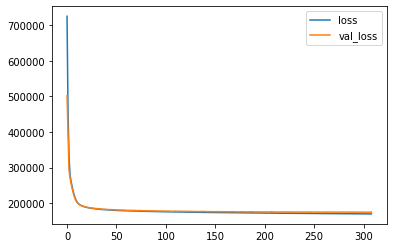

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum valid loss: {}".format(history_df['val_loss'].min()))

In [44]:
y_test_pred =model.predict(X_test)

In [45]:
y_test_pred[:5]

array([[652251.2 ],
       [632316.1 ],
       [859371.25],
       [746081.7 ],
       [836830.2 ]], dtype=float32)

In [46]:
y_test[:5]

array([688000., 455000., 723000., 880000., 930000.])

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [48]:
mean_absolute_error(y_test, y_test_pred)

174380.20713609774

In [49]:
mean_squared_error(y_test, y_test_pred)

90479691345.15611

In [50]:
r2_score(y_test, y_test_pred)

0.7370753947811737

In [51]:
y_train_pred = model.predict(X_train)

In [52]:
mean_absolute_error(y_train, y_train_pred)

169576.0355660819

In [53]:
mean_squared_error(y_train, y_train_pred)

100955651716.45244

In [54]:
r2_score(y_train, y_train_pred)

0.7161757099917689

In [55]:
from tensorflow.keras.models import load_model
model.save('house_price.h5')
print('Save!')

Save!
